# WeatherPy
----


In [2]:
# Dependencies and Setup
from datetime import date
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#initialize openweathermap url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#initiate a counter
counter = 0

#create lists to store data
lat = []
lng = []
temp = []
humid = []
cloud = []
wind = []
cntry = []
dt = []
city_ls = []

print("Beginning data retrieval...")
for city in cities:
    counter += 1
    response = requests.get(query_url + city).json()
    print(f"Processing record {counter} | City: {city}")
    try:
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"] )
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        cntry.append(response["sys"]["country"])
        dt.append(response["dt"])
        city_ls.append(city)
    except:
        print(f"Could not find all data for city: {city}")
    
    #print(query_url + city)
    time.sleep(1)
#    if counter == 5:
#        break

#print(f"The cities are: {city_ls}")
#print(f"The latitude information received is: {lat}")
#print(f"The longitude information received is: {lng}")
#print(f"The temperature information received is: {temp}")
#print(f"The humidity information received is: {humid}")
#print(f"The cloud information received is: {cloud}")
#print(f"The windy information received is: {wind}")
#print(f"The country information received is: {cntry}")
#print(f"The datetime information received is: {dt}")

Beginning data retrieval...
Processing record 1 | City: sorvag
Could not find all data for city: sorvag
Processing record 2 | City: pangnirtung
Processing record 3 | City: ushuaia
Processing record 4 | City: butaritari
Processing record 5 | City: taolanaro
Could not find all data for city: taolanaro
Processing record 6 | City: saint-francois
Processing record 7 | City: punta arenas
Processing record 8 | City: rikitea
Processing record 9 | City: uyuni
Processing record 10 | City: fortuna
Processing record 11 | City: evensk
Processing record 12 | City: mataura
Processing record 13 | City: bluff
Processing record 14 | City: laguna
Processing record 15 | City: elliot
Processing record 16 | City: bloomington
Processing record 17 | City: high level
Processing record 18 | City: ust-omchug
Processing record 19 | City: new norfolk
Processing record 20 | City: tura
Processing record 21 | City: vranjska banja
Processing record 22 | City: torbay
Processing record 23 | City: luderitz
Processing rec

Processing record 195 | City: elko
Processing record 196 | City: harper
Processing record 197 | City: narsaq
Processing record 198 | City: simpang
Processing record 199 | City: asilah
Processing record 200 | City: yelizovo
Processing record 201 | City: lebu
Processing record 202 | City: lavrentiya
Processing record 203 | City: paamiut
Processing record 204 | City: vao
Processing record 205 | City: novospasskoye
Processing record 206 | City: corinth
Processing record 207 | City: cabedelo
Processing record 208 | City: san policarpo
Processing record 209 | City: tiksi
Processing record 210 | City: novobessergenevka
Processing record 211 | City: tapaua
Could not find all data for city: tapaua
Processing record 212 | City: shancheng
Processing record 213 | City: sentyabrskiy
Could not find all data for city: sentyabrskiy
Processing record 214 | City: houston
Processing record 215 | City: isiro
Processing record 216 | City: krasne
Processing record 217 | City: abrau-dyurso
Processing record 

Processing record 382 | City: port blair
Processing record 383 | City: sungairaya
Processing record 384 | City: cabo san lucas
Processing record 385 | City: umm lajj
Processing record 386 | City: ajdabiya
Processing record 387 | City: lagoa
Processing record 388 | City: east wenatchee
Processing record 389 | City: belaya gora
Processing record 390 | City: pacific grove
Processing record 391 | City: ekhabi
Processing record 392 | City: blackwater
Processing record 393 | City: plyussa
Processing record 394 | City: huazolotitlan
Could not find all data for city: huazolotitlan
Processing record 395 | City: qaqortoq
Processing record 396 | City: saint-augustin
Processing record 397 | City: dali
Processing record 398 | City: moquegua
Processing record 399 | City: broome
Processing record 400 | City: atar
Processing record 401 | City: tumannyy
Could not find all data for city: tumannyy
Processing record 402 | City: lompoc
Processing record 403 | City: praia da vitoria
Processing record 404 | 

Processing record 573 | City: murwara
Processing record 574 | City: corning
Processing record 575 | City: sehithwa
Processing record 576 | City: severodvinsk
Processing record 577 | City: tigre
Processing record 578 | City: kalianget
Processing record 579 | City: kabare
Processing record 580 | City: novoukrayinka
Processing record 581 | City: tabuk
Processing record 582 | City: barcelos
Processing record 583 | City: wanaka
Processing record 584 | City: roswell
Processing record 585 | City: aksarka
Processing record 586 | City: chino valley
Processing record 587 | City: sao joao da barra
Processing record 588 | City: mys shmidta
Could not find all data for city: mys shmidta
Processing record 589 | City: gorontalo
Processing record 590 | City: mombaca
Processing record 591 | City: baculin
Processing record 592 | City: bireun
Processing record 593 | City: mitchell
Processing record 594 | City: taxisco


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_ls,
    "Lat": lat,
    "Lng": lat,
    "Max Temp": temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": cntry,
    "Date": dt
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangnirtung,66.1451,66.1451,5.43,77,0,3.51,CA,1612924237
1,ushuaia,-54.8000,-54.8000,62.60,72,0,4.61,AR,1612923745
2,butaritari,3.0707,3.0707,81.63,82,94,15.50,KI,1612924051
3,saint-francois,46.4154,46.4154,37.40,100,75,2.30,FR,1612924445
4,punta arenas,-53.1500,-53.1500,62.60,63,0,2.30,CL,1612923724


In [6]:
#save weather data to csv output file
try:
    weather_data.to_csv(output_data_file, index=False)
    print(f"Weather data saved to: {output_data_file}")
except:
    print(f"City weather data not saved.")

Weather data saved to: ../output_data/cities.csv


## Inspect the data and remove the cities where the humidity > 100%.
----


In [7]:
#set csv file
weather_csv = "../output_data/cities.csv"

#read csv into dataframe
weather_df = pd.read_csv(weather_csv)

#determine original row count
orig_len = len(weather_df)

#drop dataframe rows where the humidity is above 100
indexes_to_drop = weather_df.loc[weather_df["Humidity"]>100, :].index

#drop any rows within current dataframe where humidity above 100%
weather_df.drop(indexes_to_drop, inplace=True)

#determine new row count
dropped_index_len = len(weather_df)

#determine if rows were dropped due to over 100 humidity
if orig_len == dropped_index_len:
    print(f"There were no records with humidity above 100%.")
    
else:
    dropped_row_count = orig_len - dropped_index_len
    print(f"There were {dropped_row_count} rows dropped. The new row count is {dropped_index_len}.")
    
weather_df.head()

There were no records with humidity above 100%.


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pangnirtung,66.1451,66.1451,5.43,77,0,3.51,CA,1612924237
1,ushuaia,-54.8000,-54.8000,62.60,72,0,4.61,AR,1612923745
2,butaritari,3.0707,3.0707,81.63,82,94,15.50,KI,1612924051
3,saint-francois,46.4154,46.4154,37.40,100,75,2.30,FR,1612924445
4,punta arenas,-53.1500,-53.1500,62.60,63,0,2.30,CL,1612923724


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

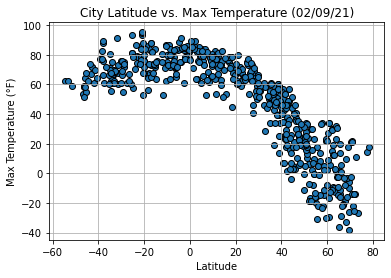

In [10]:
lat_axis = weather_df["Lat"]
temp_axis = weather_df["Max Temp"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, temp_axis, edgecolors="black")
plt.ylabel("Max Temperature (\N{DEGREE SIGN}F)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Max Temperature ({today})")
plt.grid()

plt.savefig("../output_data/Lat_vs_Temp.png")

plt.show()



## Latitude vs. Humidity Plot

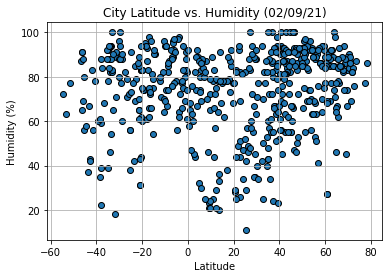

In [11]:
lat_axis = weather_df["Lat"]
humid_axis = weather_df["Humidity"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, humid_axis, edgecolors="black")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Humidity ({today})")
plt.grid()

plt.savefig("../output_data/Lat_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

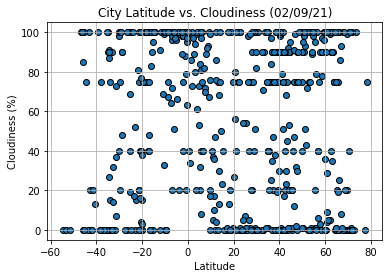

In [12]:
lat_axis = weather_df["Lat"]
cloud_axis = weather_df["Cloudiness"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, cloud_axis, edgecolors="black")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Cloudiness ({today})")
plt.grid()

plt.savefig("../output_data/Lat_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

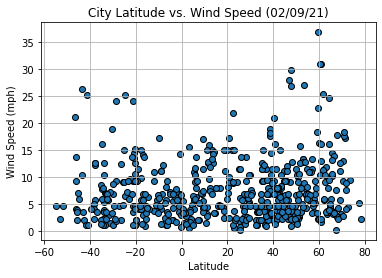

In [13]:
lat_axis = weather_df["Lat"]
wind_axis = weather_df["Wind Speed"]
today = date.today().strftime("%m/%d/%y")

plt.scatter(lat_axis, wind_axis, edgecolors="black")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.title(f"City Latitude vs. Wind Speed ({today})")
plt.grid()

plt.savefig("../output_data/Lat_vs_Wind.png")

plt.show()

## Linear Regression
The following models use these r-value descriptors:
 - 0.00-0.19: very weak
 - 0.20-0.39: weak
 - 0.40-0.59: moderate 
 - 0.60-0.79: strong
 - 0.80-1.00: very strong

In [15]:
#Split weather data into northern souther hemispheres
north_weather_df = weather_df.loc[weather_df["Lat"]>=0, :]
south_weather_df = weather_df.loc[weather_df["Lat"]<0, :]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.8787868931191358


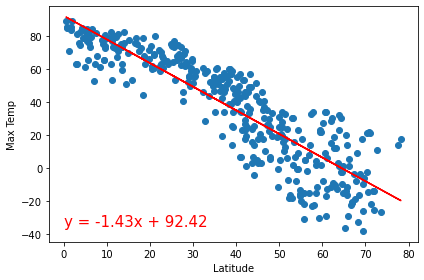

This model shows the relationship between temperature
and proximity to the equator for cities in the Northern Hemisphere.
This shows a very strong relationship, such that, as a city gets further
from the equator, it's maximum temperature decreases.


In [79]:
lat_axis = north_weather_df["Lat"]
temp_axis = north_weather_df["Max Temp"]

plt.scatter(lat_axis, temp_axis)
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, temp_axis)

#y=mx+b
regress_values = lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(0,-35),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()
plt.show()

print(f"This model shows the relationship between temperature\n\
and proximity to the equator for cities in the Northern Hemisphere.\n\
This shows a very strong relationship, such that, as a city gets further\n\
from the equator, it's maximum temperature decreases.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.46840058882440494


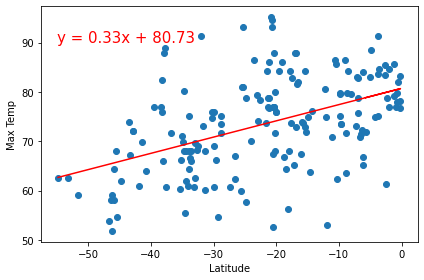

This model shows the relationship between temperature
and proximity to the equator for cities in the Southern Hemisphere.
This shows a moderate relationship, such that, as a city gets closer
to the equator, it's maximum temperature may increase.


In [80]:
lat_axis = south_weather_df["Lat"]
temp_axis = south_weather_df["Max Temp"]

plt.scatter(lat_axis, temp_axis)
plt.ylabel("Max Temp")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, temp_axis)

#y=mx+b
regress_values = lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(-55, 90),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()
plt.show()

print(f"This model shows the relationship between temperature\n\
and proximity to the equator for cities in the Southern Hemisphere.\n\
This shows a moderate relationship, such that, as a city gets closer\n\
to the equator, it's maximum temperature may increase.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.32839101554733036


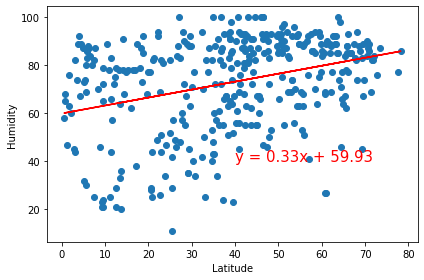

This model shows the relationship between humidity
and proximity to the equator for cities in the Northern Hemisphere.
This shows a weak relationship, such that, as a city gets further
from the equator, it's humidity may increase.


In [81]:
lat_axis = north_weather_df["Lat"]
humid_axis = north_weather_df["Humidity"]

plt.scatter(lat_axis, humid_axis)
plt.ylabel("Humidity")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, humid_axis)

#y=mx+b
regress_values = lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()
plt.show()

print(f"This model shows the relationship between humidity\n\
and proximity to the equator for cities in the Northern Hemisphere.\n\
This shows a weak relationship, such that, as a city gets further\n\
from the equator, it's humidity may increase.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.21975011818431486


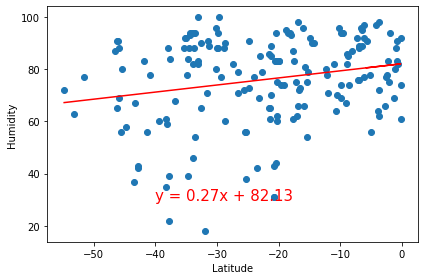

This model shows the relationship between humidity
and proximity to the equator for cities in the Northern Hemisphere.
This shows a weak relationship, such that, as a city gets closer
to the equator, it's humidity may increase.


In [82]:
lat_axis = south_weather_df["Lat"]
humid_axis = south_weather_df["Humidity"]

plt.scatter(lat_axis, humid_axis)
plt.ylabel("Humidity")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_axis, humid_axis)

#y=mx+b
regress_values = lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(lat_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,30),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()
plt.show()

print(f"This model shows the relationship between humidity\n\
and proximity to the equator for cities in the Northern Hemisphere.\n\
This shows a weak relationship, such that, as a city gets closer\n\
to the equator, it's humidity may increase.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is -0.014552254856282006


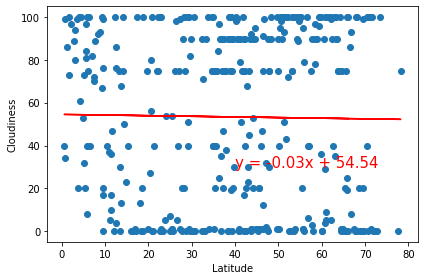

This model shows the relationship between cloudiness
and proximity to the equator for cities in the Northern Hemisphere.
This shows a very weak relationship, such that, as a city gets further
from the equator, there is no indication how cloudy it will be.


In [83]:
n_lat_axis = north_weather_df["Lat"]
n_cloud_axis = north_weather_df["Cloudiness"]

plt.scatter(n_lat_axis, n_cloud_axis)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_axis, n_cloud_axis)

#y=mx+b
regress_values = n_lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(n_lat_axis,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()
plt.show()

print(f"This model shows the relationship between cloudiness\n\
and proximity to the equator for cities in the Northern Hemisphere.\n\
This shows a very weak relationship, such that, as a city gets further\n\
from the equator, there is no indication how cloudy it will be.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.35940151370980705


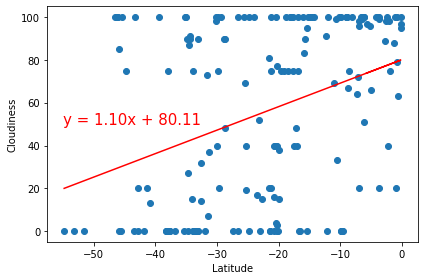

This model shows the relationship between cloudiness
and proximity to the equator for cities in the Southern Hemisphere.
This shows a weak relationship, such that, as a city gets closer
to the equator, it may be cloudier.


In [84]:
s_lat_axis = south_weather_df["Lat"]
s_cloud_axis = south_weather_df["Cloudiness"]

plt.scatter(s_lat_axis, s_cloud_axis)
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_axis, s_cloud_axis)

#y=mx+b
regress_values = s_lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(s_lat_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()
plt.show()

print(f"This model shows the relationship between cloudiness\n\
and proximity to the equator for cities in the Southern Hemisphere.\n\
This shows a weak relationship, such that, as a city gets closer\n\
to the equator, it may be cloudier.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.13601388416573595


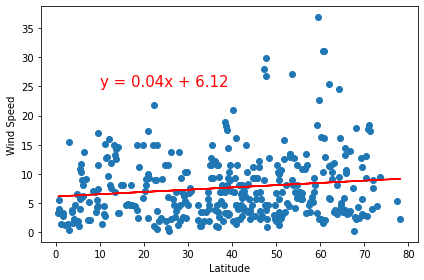

This model shows the relationship between wind speed
and proximity to the equator for cities in the Northern Hemisphere.
This shows a very weak relationship, such that, as a city gets further
from the equator, there is no indication how windy it will be.


In [85]:
n_lat_axis = north_weather_df["Lat"]
n_wind_axis = north_weather_df["Wind Speed"]

plt.scatter(n_lat_axis, n_wind_axis)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(n_lat_axis, n_wind_axis)

#y=mx+b
regress_values = n_lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(n_lat_axis,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()
plt.show()

print(f"This model shows the relationship between wind speed\n\
and proximity to the equator for cities in the Northern Hemisphere.\n\
This shows a very weak relationship, such that, as a city gets further\n\
from the equator, there is no indication how windy it will be.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.11901513757543886


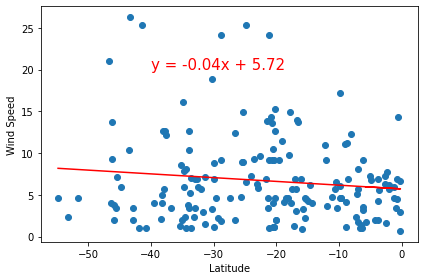

This model shows the relationship between wind speed
and proximity to the equator for cities in the Southern Hemisphere.
This shows a weak relationship, such that, as a city gets closer
to the equator, there is no indication how windy it will be.


In [86]:
s_lat_axis = south_weather_df["Lat"]
s_wind_axis = south_weather_df["Wind Speed"]

plt.scatter(s_lat_axis, s_wind_axis)
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")

#linear regression data points
(slope, intercept, rvalue, pvalue, stderr) = linregress(s_lat_axis, s_wind_axis)

#y=mx+b
regress_values = s_lat_axis * slope + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(s_lat_axis,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")

print(f"The r-value is {rvalue}")

plt.tight_layout()
plt.show()

print(f"This model shows the relationship between wind speed\n\
and proximity to the equator for cities in the Southern Hemisphere.\n\
This shows a weak relationship, such that, as a city gets closer\n\
to the equator, there is no indication how windy it will be.")